#### MAKE PLOT OF VOC VS RT CORRELATION BY ELO (Figure 3 of paper)

This is to be called after "Aggregate 

In [1]:
# load packages
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import time
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.rcParams['svg.fonttype'] = 'none'


In [3]:
these_tcs = ['60+0', '120+1', '180+0',
                '180+2', '300+0', '300+3',
                '600+0', '600+5', '900+10',
                '1800+0', '1800+20']

job_idxs = range(11)

In [4]:
# load the main RT dfs...
# working_folder = '/home/erussek/projects/Chess_Project';
working_folder = '/Users/erussek/Dropbox/Griffiths_Lab_Stuff/Code/Thinking_Time_VOC_Chess'
to_save_folder = os.path.join(working_folder, "aggregate_r_spear_vs_elo")
res_dfs=[]
i = 0
for i in range(len(these_tcs)):
    for job_idx in job_idxs:
        file_name = 'r_spear_vs_elo_{}_{}'.format(these_tcs[i],job_idx)
        res_df = pd.read_csv(os.path.join(to_save_folder, file_name), index_col=0)
        res_df['time_condition']=these_tcs[i]
        res_df['job_idx']=job_idx
        res_dfs.append(res_df)

In [5]:
res_df = pd.concat(res_dfs,ignore_index=False)
res_df = res_df.loc[res_df.r_spear_count>0].reset_index()

In [6]:
agg_df = res_df.groupby(['elo_bin', 'time_condition']).agg({'r_spear_mean':'mean', 'r_spearsquared_mean':'mean', 'r_spear_count': 'sum'}).reset_index()
agg_df.elo_bin[agg_df.elo_bin < 700] = 700
agg_df.elo_bin[agg_df.elo_bin > 2300] = 2300

In [7]:
agg_df['sem']=np.sqrt(agg_df['r_spearsquared_mean'] - np.power(agg_df['r_spearsquared_mean'],2))/np.sqrt(agg_df['r_spear_count'])

In [8]:
agg_df = agg_df.loc[agg_df.r_spear_count > 100]

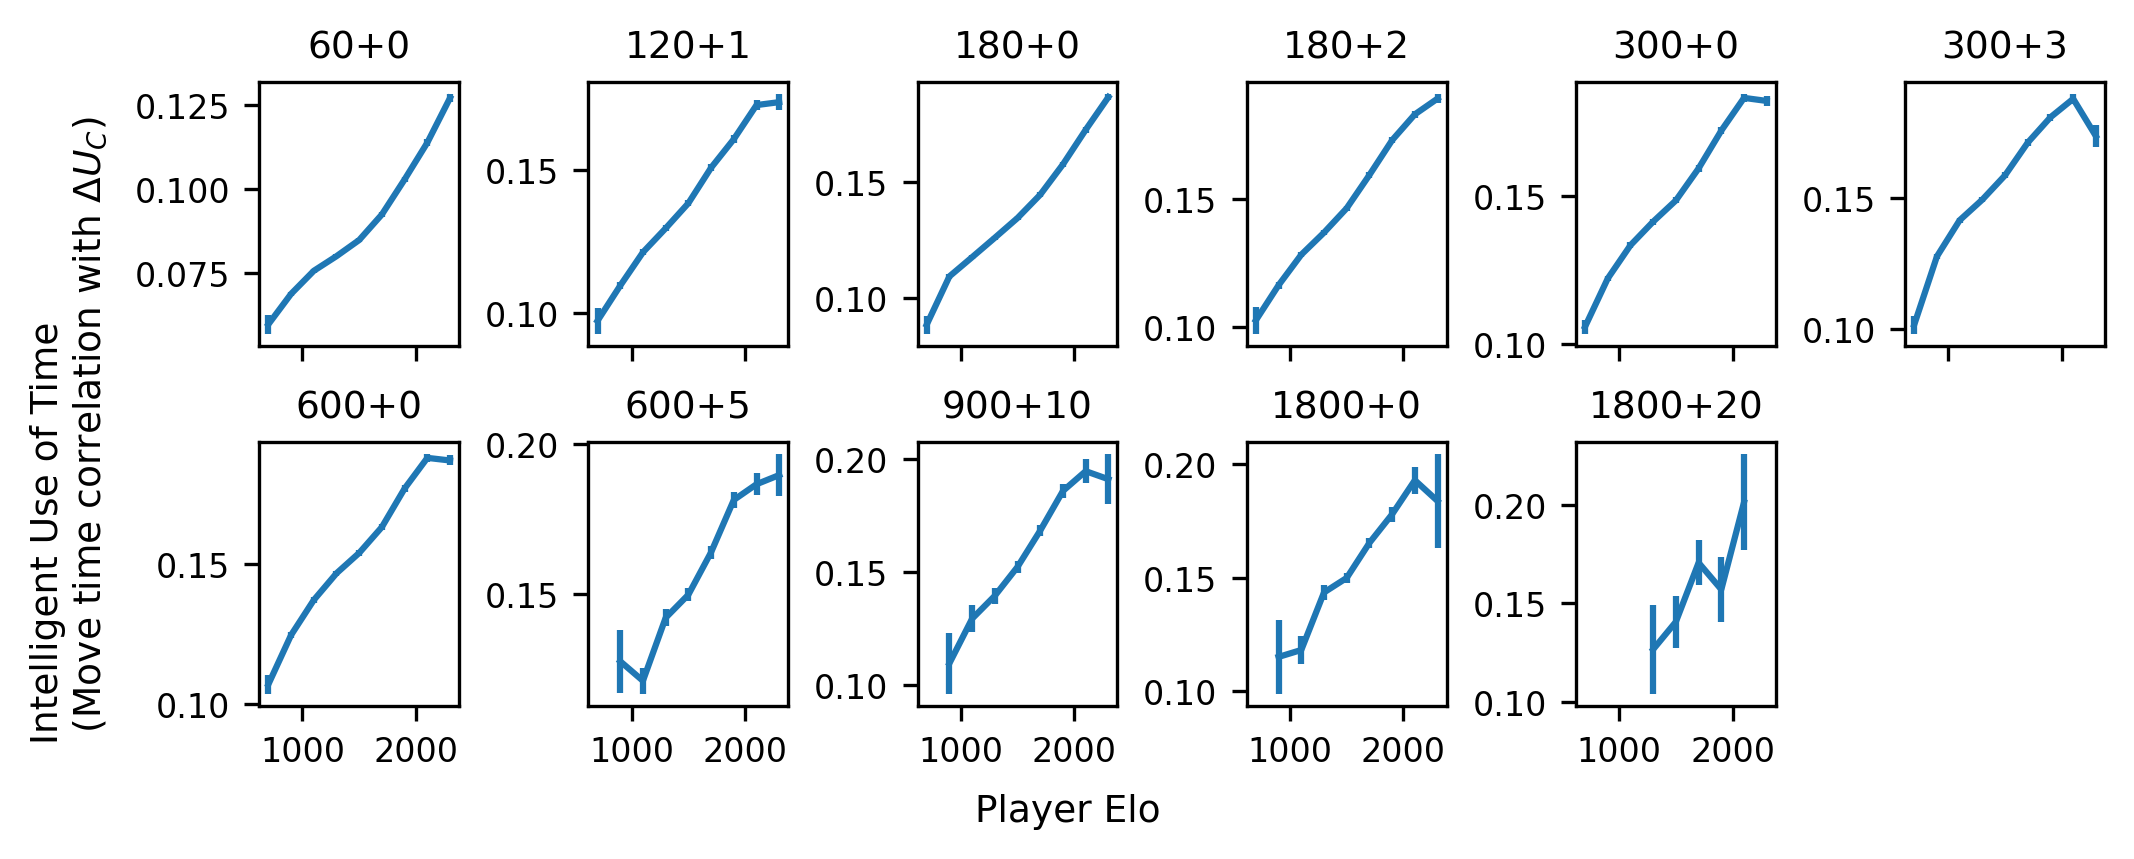

In [10]:
fig,ax = plt.subplots(2,6,constrained_layout=True,sharex=True,figsize=(7,2.75),dpi=300)
plt.rcParams['font.size'] = 8

# make this a subplot

for i in range(len(these_tcs)):
    
    row = int(np.floor(i / 6))
    col = i % 6
    
    # if col == 0 & row == 0:
    #    ax[row,col].set_ylabel('Move Time (Seconds)')
    tc_df = agg_df.loc[agg_df.time_condition == these_tcs[i]].reset_index(drop=True)
    #ax[row,col].plot(tc_df.voc_bin, tc_df.rtmean)
    ax[row,col].errorbar(tc_df.elo_bin, tc_df.r_spear_mean,yerr=tc_df['sem'])
    ax[row,col].set_title(these_tcs[i], fontsize=9)
    
    #plot_bottom = tc_df.rtmean[0]*.9
    #plot_top = tc_df.rtmean.iloc[-1] + (tc_df.rtmean.iloc[-1] - tc_df.rtmean[0])/2
    #ax[row,col].set_ylim(plot_bottom,plot_top)
    #ax[row,col].set_ylim(.05, .21)

fig.supxlabel('Player Elo', fontsize=9)
fig.supylabel('Intelligent Use of Time \n (Move time correlation with $\Delta U_{C}$)',fontsize=9)

fig.delaxes(ax[1,5])
# plt.savefig("paper_figs/RT_data_plot.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
# plt.savefig("paper_figs/RT_data_plot.pdf", format='pdf', transparent=True,  bbox_inches='tight',pad_inches=0)
